In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

PATH = "/Users/benpfeffer/Library/Mobile Documents/com~apple~CloudDocs/projects-portfolio-main/5-octobre/"

In [2]:
order = pd.read_csv(f"{PATH}/data/raw/Order Dec 17 2024.csv", delimiter=";")
order_2 = pd.read_csv(f"{PATH}/data/raw/Order Dec 17 2024 (1).csv", delimiter=";")
print(order.shape)
print(order_2.shape)
order_2.columns = order.columns
order = pd.concat([order, order_2])

order.to_csv(f"{PATH}/data/processed/order.csv", index=False)


(468, 9)
(1000, 9)


In [3]:
cart = pd.read_csv(f"{PATH}/data/raw/Cart Data Dec 17 2024.csv", delimiter=";")
cart2 = pd.read_csv(f"{PATH}/data/raw/Cart Data Dec 17 2024 (1).csv", delimiter=";")
cart3 = pd.read_csv(f"{PATH}/data/raw/Cart Data Dec 17 2024 (2).csv", delimiter=";")

cart = pd.concat([cart, cart2, cart3])
cart.to_csv(f"{PATH}/data/processed/cart.csv", index=False)


In [4]:
print(order.isnull().sum()) 
print("-"*100)
print(cart.isnull().sum())

id                0
Référence         0
Nouveau client    0
Livraison         0
Client            8
Total             0
Paiement          0
État              0
Date              0
dtype: int64
----------------------------------------------------------------------------------------------------
id                 0
ID commande        0
Client          2280
Total              0
Transporteur    2609
Date               0
dtype: int64


In [5]:
# Fill NaN values in order DataFrame
order['Client'] = order['Client'].fillna('Unknown')  # Fill missing client names with 'Unknown'
order = order.fillna(0)  # Fill remaining numeric columns with 0

# Fill NaN values in cart DataFrame 
cart['Client'] = cart['Client'].fillna('Unknown')  # Fill missing client names with 'Unknown'
cart['Transporteur'] = cart['Transporteur'].fillna('Unknown')  # Fill missing transporteur names with 'Unknown'

# Verify no more null values
print("Order DataFrame null check:")
print(order.isnull().sum())
print("\nCart DataFrame null check:") 
print(cart.isnull().sum())


Order DataFrame null check:
id                0
Référence         0
Nouveau client    0
Livraison         0
Client            0
Total             0
Paiement          0
État              0
Date              0
dtype: int64

Cart DataFrame null check:
id              0
ID commande     0
Client          0
Total           0
Transporteur    0
Date            0
dtype: int64


In [6]:
order.to_csv(f"{PATH}/data/cleaned/order.csv", index=False)
cart.to_csv(f"{PATH}/data/cleaned/cart.csv", index=False)


In [7]:
clients = pd.read_csv("/Users/benpfeffer/Library/Mobile Documents/com~apple~CloudDocs/projects-portfolio-main/5-octobre/data/analysis/customer_segmentation.csv")

In [18]:
c = clients.sort_values(by="Total", ascending=False)
c.head()
c

,Client,Total,cumsum_val,segment
0,F. zanni,34092.0,34092.0,High-value
1,M. Bonnet,16360.0,50452.0,High-value
2,C. Tailleferd,14890.0,65342.0,High-value
3,S. Ghermaoui,10150.0,75492.0,High-value
4,C. Barnes,8650.0,84142.0,High-value
...,...,...,...,...
1086,A. Denaux,125.0,857681.0,Low-value
1087,E. Barbosa,125.0,857806.0,Low-value
1088,L. RENAUD,115.0,857921.0,Low-value
1089,J. Alken-Theasby,110.0,858031.0,Low-value


In [27]:
order = pd.read_csv(f"{PATH}/data/cleaned/order.csv")

In [28]:
order.head()

,id,Référence,Nouveau client,Livraison,Client,Total,Paiement,État,Date
0,468,EOCSEVOVW,1,Lituanie,K. Kybartaite,205.0,Card via Stripe,Livré,2022-04-29 12:52:00
1,467,YKNOEEZEX,1,Suisse,F. zanni,1542.0,Card via Stripe,Livré,2022-04-28 21:22:45
2,466,LHCRAEYPL,1,Belgique,O. Voortman,780.0,Transfert bancaire,Livré,2022-04-26 13:57:29
3,465,IVTTHQOYH,1,France,R. Jeanjean,480.0,Card via Stripe,Livré,2022-04-25 20:52:39
4,464,FQDTAFHIK,1,Suisse,A. Kiialainen,208.0,Card via Stripe,Livré,2022-04-20 23:22:20


In [51]:
print(f"Count the amounts of transactions each client has made:")
print("####"*20)
c = order['Client'].value_counts().head(10)
print(order['Client'].value_counts().head(10))

s =(order.groupby('Client')['Total'].sum().sort_values(ascending=False).head(10))
print(order.groupby('Client')['Total'].sum().sort_values(ascending=False).head(15))


Count the amounts of transactions each client has made:
################################################################################
Client
F. zanni          24
C. Tailleferd     16
A. Tournerie      11
M. Bonnet          9
S. Ghermaoui       6
F. Azais           6
L. Skanberg        6
G. Flament         5
M. DE RAFELIS      5
C. vuillemenot     4
Name: count, dtype: int64
Client
F. zanni             34092.0
M. Bonnet            16360.0
C. Tailleferd        14890.0
S. Ghermaoui         10150.0
C. Barnes             8650.0
C. vuillemenot        7354.0
A. Tournerie          7065.0
S. Delprat            6750.0
L. Skanberg           6635.0
D. ANDERS LEDROIT     6380.0
S. Endler             5650.0
O. Anderson           5130.0
T. TAUPIN             4885.0
J. Melton             4720.0
F. Azais              4582.0
Name: Total, dtype: float64


In [39]:
# avg order value per client
s / c


Client
A. Tournerie          642.272727
C. Barnes                    NaN
C. Tailleferd         930.625000
C. vuillemenot       1838.500000
D. ANDERS LEDROIT            NaN
F. Azais                     NaN
F. zanni             1420.500000
G. Flament                   NaN
L. Skanberg          1105.833333
M. Bonnet            1817.777778
M. DE RAFELIS                NaN
S. Delprat                   NaN
S. Ghermaoui         1691.666667
dtype: float64

/var/folders/8p/tyj3gj5j7f54558fzrt60f700000gn/T/ipykernel_56780/1073580524.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_top_2['Date'] = pd.to_datetime(orders_top_2['Date'])


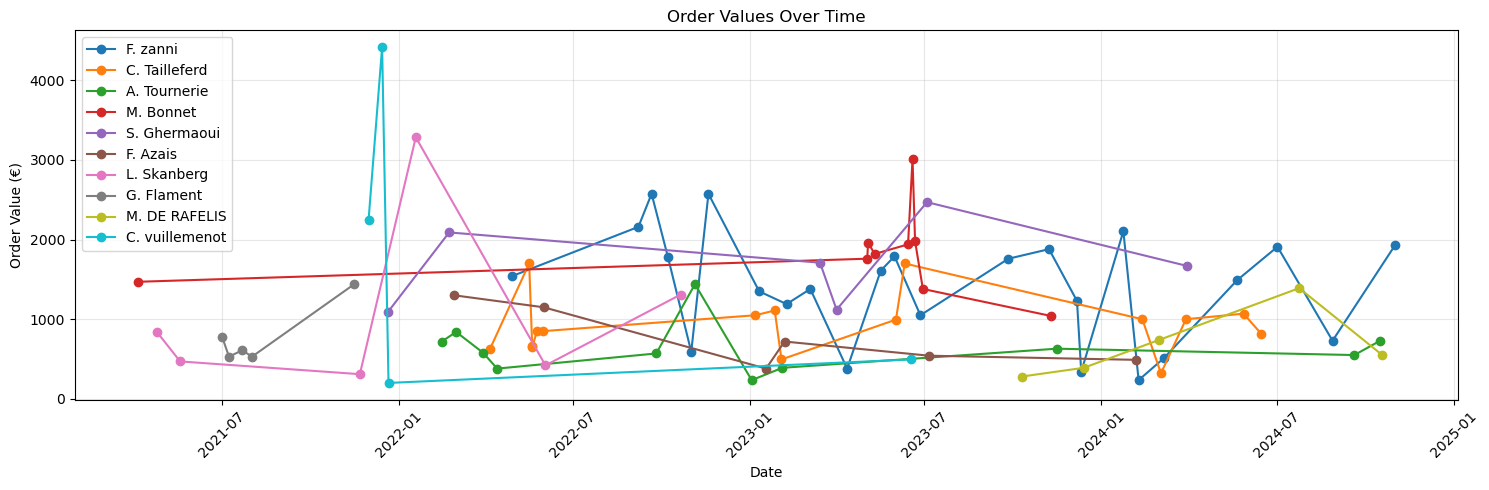

In [50]:
# Create a timeline plot of orders for top 2 clients
top_2_clients = order['Client'].value_counts().head(10).index
orders_top_2 = order[order['Client'].isin(top_2_clients)]

# Convert Date to datetime and sort
orders_top_2['Date'] = pd.to_datetime(orders_top_2['Date'])
orders_top_2 = orders_top_2.sort_values('Date')

plt.figure(figsize=(15,5))

# Create a single plot with both clients
for client in top_2_clients:
    client_orders = orders_top_2[orders_top_2['Client'] == client]
    plt.plot(client_orders['Date'], client_orders['Total'],
             marker='o', label=client)

plt.title('Order Values Over Time')
plt.xlabel('Date') 
plt.ylabel('Order Value (€)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


In [5]:
retail_df = pd.read_csv(f"{PATH}/data/raw/savs.csv")
retail_df

,#,Date,Ref,Libellé,Cust,Qté,PV TTC,CA TTC
0,9509,29 Mar 2021,3495,Jenna Burnt Grey,Stéphanie DUBAL POTTERS,1,640.00 €,640.00 €
1,9508,29 Mar 2021,5904,CAROL * Diamant,Stéphanie DUBAL POTTERS,1,740.00 €,740.00 €
2,9507,29 Mar 2021,4421,KAN 2 Vermeil - Or 14k - multi,CHRISTINE LAPORTE,1,490.00 €,490.00 €
3,9506,29 Mar 2021,5902,ANGELA 12 * Or 14k,Corine SELOSSE,1,470.00 €,470.00 €
4,9570,30 Apr 2021,2530,NAEL Diamant 55,Hubert LEDOUX,1,235.00 €,235.00 €
...,...,...,...,...,...,...,...,...
1736,17244,02 Dec 2024,7288,DODDIE* neck Or 14k - pearl,Gaëtan Duchesne,1,460.00 €,460.00 €
1737,17243,02 Dec 2024,6878,FLORA MORGA Or 14k - Morganite,Lav Lukic,1,890.00 €,890.00 €
1738,17242,02 Dec 2024,9691,FLORA MORGA* Or 14k - Morganite 51,Lav Lukic,1,635.00 €,635.00 €
1739,17241,02 Dec 2024,7773,TENA amy Or 14k - Amethyste,Irina Wunder,1,624.82€(660.00$),624.82€(660.00$)


In [6]:
# Convert PV TTC and CA TTC to float by removing currency symbols and converting
retail_df['PV TTC'] = retail_df['PV TTC'].str.replace('€', '').str.replace('$', '')
retail_df['CA TTC'] = retail_df['CA TTC'].str.replace('€', '').str.replace('$', '')

# Extract numeric values from parentheses if present
retail_df['PV TTC'] = retail_df['PV TTC'].apply(lambda x: x.split('(')[0] if '(' in str(x) else x)
retail_df['CA TTC'] = retail_df['CA TTC'].apply(lambda x: x.split('(')[0] if '(' in str(x) else x)

# Convert to float, replacing any remaining non-numeric characters
retail_df['PV TTC'] = retail_df['PV TTC'].str.replace(',', '.').astype(float)
retail_df['CA TTC'] = retail_df['CA TTC'].str.replace(',', '.').astype(float)


In [26]:
# Convert Date column to datetime
retail_df['Date'] = pd.to_datetime(retail_df['Date'], format='%d %b %Y')
retail_df

retail_df.drop_duplicates(inplace=True)
retail_df.to_csv(f"{PATH}/data/cleaned/retail.csv", index=False)

In [31]:
inventory_df = pd.read_csv(f"{PATH}/data/raw/Retail Export Dec 22 2024 (2).csv")
inventory_df.head()


,id,SFA,lib,EAN,qty,Factory Price,Group Price,RETAIL,RETAIL_US
0,918,Creoles,LARA AR - PRESTA JAMES Argent doré,3666023008545,4,"22,33",67,180,270
1,1313,Collier,KIM black Argent doré or fin,3666023012252,1,36,108,295,420
2,1723,Bague,COEUR SIMPLE Argent doré or fin 51,3666023016281,1,"7,06",50,120,200
3,1724,Bague,COEUR SIMPLE Argent doré or fin 53,3666023016298,1,"7,06",50,120,200
4,1729,Bague,HEARTIE Diamant 51,3666023016335,1,"20,20",62,170,240


In [32]:
inventory_df.dtypes

id                int64
SFA              object
lib              object
EAN               int64
qty               int64
Factory Price    object
Group Price       int64
RETAIL            int64
RETAIL_US         int64
dtype: object

In [33]:
# Clean Factory Price by removing currency symbol and converting comma to period
inventory_df['Factory Price'] = inventory_df['Factory Price'].str.replace(',', '.').astype(float)

# Normalize column names to snake_case
inventory_df.columns = inventory_df.columns.str.lower().str.replace(' ', '_')
inventory_df = inventory_df.drop(columns=['group_price'], axis = 1)
print(inventory_df.shape)
inventory_df.drop_duplicates(inplace=True)
print(inventory_df.shape)
# Save cleaned inventory data
#inventory_df.to_csv(f"{PATH}/data/cleaned/inventory.csv", index=False)

(519, 8)
(519, 8)


In [34]:
inventory_df.to_csv(f"{PATH}/data/cleaned/inventory.csv", index=False)